## Exploration Kernel - Costa Rica Poverty

Many social programs have a hard time making sure the right people are given enough aid. It’s especially tricky when a program focuses on the poorest segment of the population. The world’s poorest typically can’t provide the necessary income and expense records to prove that they qualify. Beyond Costa Rica, many countries face this same problem of inaccurately assessing social need. 

A popular algorithm called the Proxy Means Test (or PMT) is used to verify income qualification along with family’s observable household attributes like the material of their walls and ceiling, or the assets found in the home to classify them and predict their level of need. This is an improvement but accuracy remains a problem as the region’s population grows and poverty declines.

In this [competition](https://www.kaggle.com/c/costa-rican-household-poverty-prediction), the dataset is shared with similar attributes with an aim to improve the accuracy of household poverty prediction. In this kernel, I have performed exploration, feature engineering, and baseline model.  

In [26]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 1000})

In [1]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

import featuretools as ft


import matplotlib.pyplot as plt
import seaborn as sns
import random 
import warnings
import operator
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

/Users/Arnaud/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning:

Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.



<hr>
## Part A : Exploration
<hr>

## 1. Dataset Preparation

Lets view the snapshot of the dataset which is given for training and testing purposes

In [2]:

train = pd.read_csv("../Kaggle/costa-rican-household-poverty-prediction/train.csv")
test = pd.read_csv("../Kaggle/costa-rican-household-poverty-prediction/test.csv")

print ("Train Dataset: Rows, Columns: ", train.shape)
print ("Test Dataset: Rows, Columns: ", test.shape)

Train Dataset: Rows, Columns:  (9557, 143)
Test Dataset: Rows, Columns:  (23856, 142)


In [3]:
print ("Glimpse of Train Dataset: ")
train.head()

Glimpse of Train Dataset: 


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
print ("Summary of Train Dataset: ")
train.describe()

Summary of Train Dataset: 


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [5]:
print ("Top Columns having missing values")
missmap = train.isnull().sum().to_frame()
missmap = missmap.sort_values(0, ascending = False)
missmap.head()

Top Columns having missing values


,0
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5


## 2. Different Levels of Poverty Household Groups 

In [6]:
target = train['Target'].value_counts().to_frame()
levels = ["NonVulnerable", "Moderate Poverty", "Vulnerable", "Extereme Poverty"]
trace = go.Bar(y=target.Target, x=levels, marker=dict(color='orange', opacity=0.6))
layout = dict(title="Household Poverty Levels", margin=dict(l=200), width=800, height=400)
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 3. What do households own ?

In [8]:
tr1 = train[train['Target'] == 1][col].value_counts().to_dict()

NameError: name 'col' is not defined

In [7]:
def compare_plot(col, title):
    tr1 = train[train['Target'] == 1][col].value_counts().to_dict()
    tr2 = train[train['Target'] == 2][col].value_counts().to_dict()
    tr3 = train[train['Target'] == 3][col].value_counts().to_dict()
    tr4 = train[train['Target'] == 4][col].value_counts().to_dict()
    
    xx = ['Extereme', 'Moderate', 'Vulnerable', 'NonVulnerable']
    trace1 = go.Bar(y=[tr1[0], tr2[0], tr3[0], tr4[0]], name="Not Present", x=xx, marker=dict(color="orange", opacity=0.6))
    trace2 = go.Bar(y=[tr1[1], tr2[1], tr3[1], tr4[1]], name="Present", x=xx, marker=dict(color="purple", opacity=0.6))
    
    return trace1, trace2 
    
tr1, tr2 = compare_plot("v18q", "Tablet")
tr3, tr4 = compare_plot("refrig", "Refrigirator")
tr5, tr6 = compare_plot("computer", "Computer")
tr7, tr8 = compare_plot("television", "Television")
tr9, tr10 = compare_plot("mobilephone", "MobilePhone")
titles = ["Tablet", "Refrigirator", "Computer", "Television", "MobilePhone"]

fig = tools.make_subplots(rows=3, cols=2, print_grid=False, subplot_titles=titles)
fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 1)
fig.append_trace(tr3, 1, 2)
fig.append_trace(tr4, 1, 2)
fig.append_trace(tr5, 2, 1)
fig.append_trace(tr6, 2, 1)
fig.append_trace(tr7, 2, 2)
fig.append_trace(tr8, 2, 2)
fig.append_trace(tr9, 3, 1)
fig.append_trace(tr10, 3, 1)

fig['layout'].update(height=1000, title="What do Households Own", barmode="stack", showlegend=False)
iplot(fig)

## 4. Key Characteristics of the Households 

## 4.1 Household Materials and Methods

In [9]:
def find_prominent(row, mats):
    for c in mats:
        if row[c] == 1:
            return c
    return 

def combine(starter, colname, title, replacemap):
    mats = [c for c in train.columns if c.startswith(starter)]
    train[colname] = train.apply(lambda row : find_prominent(row, mats), axis=1)
    train[colname] = train[colname].apply(lambda x : replacemap[x] if x != None else x )

    om1 = train[train['Target'] == 1][colname].value_counts().to_frame()
    om2 = train[train['Target'] == 2][colname].value_counts().to_frame()
    om3 = train[train['Target'] == 3][colname].value_counts().to_frame()
    om4 = train[train['Target'] == 4][colname].value_counts().to_frame()

    trace1 = go.Bar(y=om1[colname], x=om1.index, name="Extereme", marker=dict(color='red', opacity=0.9))
    trace2 = go.Bar(y=om2[colname], x=om2.index, name="Moderate", marker=dict(color='red', opacity=0.5))
    trace3 = go.Bar(y=om3[colname], x=om3.index, name="Vulnerable", marker=dict(color='green', opacity=0.5))
    trace4 = go.Bar(y=om4[colname], x=om4.index, name="NonVulnerable", marker=dict(color='green', opacity=0.9))
    return [trace1, trace2, trace3, trace4]

titles = ["Outside Wall Material", "Floor Material", "Roof Material", "Sanitary Conditions", "Cooking Energy Sources", "Disposal Methods"]
fig = tools.make_subplots(rows=3, cols=2, print_grid=False, subplot_titles=titles)

### outside material
flr = {'paredblolad' : "Block / Brick", "paredpreb" : "Cement", "paredmad" : "Wood",
      "paredzocalo" : "Socket", "pareddes" : "Waste Material", "paredfibras" : "Fibres",
      "paredother" : "Other", "paredzinc": "Zink"}
res = combine("pared", "outside_material", "Predominanat Material of the External Walls", flr)      
for x in res:
    fig.append_trace(x, 1, 1)

### floor material 
flr = {'pisomoscer' : "Mosaic / Ceramic", "pisocemento" : "Cement", "pisonatur" : "Natural Material",
      "pisonotiene" : "No Floor", "pisomadera" : "Wood", "pisoother" : "Other"}
res = combine("piso", "floor_material", "Floor Material of the Households", flr)
for x in res:
    fig.append_trace(x, 1, 2)

### Roof Material
flr = {'techozinc' : "Zinc", "techoentrepiso" : "Fibre / Cement", "techocane" : "Natural Fibre", "techootro" : "Other"}
res = combine("tech", "roof_material", "Roof Material of the Households", flr)  
for x in res:
    fig.append_trace(x, 2, 1)


### Sanitary Conditions
flr = {'sanitario1' : "No Toilet", "sanitario2" : "Sewer / Cesspool", "sanitario3" : "Septic Tank",
       "sanitario5" : "Black Hole", "sanitario6" : "Other System"}
res = combine("sanit", "sanitary", "Sanitary Conditions of the Households", flr)
for x in res:
    fig.append_trace(x, 2, 2)

### Energy Source
flr = {'energcocinar1' : "No Kitchen", "energcocinar2" : "Electricity", "energcocinar3" : "Cooking Gas",
       "energcocinar4" : "Wood Charcoal"}
res = combine("energ", "energy_source", "Main source of energy for cooking", flr)  
for x in res:
    fig.append_trace(x, 3, 1)

### Disposal Methods
flr = {"elimbasu1":"Tanker truck",
"elimbasu2": "Buried",
"elimbasu3": "Burning",
"elimbasu4": "Unoccupied space",
"elimbasu5": "River",
"elimbasu6": "Other"}
res = combine("elim", "waste_method", "Rubbish Disposals Method", flr)  
for x in res:
    fig.append_trace(x, 3, 2)

fig['layout'].update(height=900, title="Key Characteristics of Households", barmode="stack", showlegend=False)
iplot(fig)

## 4.2 Quality of Walls, Roof, and Floor

In [10]:
def find_prominent2(row, mats):
    for i,c in enumerate(mats):
        if row[c] == 1 and c.endswith("1"):
            return "Bad"
        elif row[c] == 1 and c.endswith("2"):
            return "Regular"
        elif row[c] == 1 and c.endswith("3"):
            return "Good"
    return 

badwl = [c for c in train.columns if c.startswith("epar")]
badrf = [c for c in train.columns if c.startswith("etec")]
badfl = [c for c in train.columns if c.startswith("eviv")]
train["WallQuality"] = train.apply(lambda row : find_prominent2(row, badwl), axis=1)
train["RoofQuality"] = train.apply(lambda row : find_prominent2(row, badrf), axis=1)
train["FloorQuality"] = train.apply(lambda row : find_prominent2(row, badfl), axis=1)

wd1 = train[train['Target']==1]['WallQuality'].value_counts()
wd2 = train[train['Target']==2]['WallQuality'].value_counts()
wd3 = train[train['Target']==3]['WallQuality'].value_counts()
wd4 = train[train['Target']==4]['WallQuality'].value_counts()
trace1=go.Bar(x=wd1.index, y=wd1.values, marker=dict(color="red", opacity=0.99), name="Extereme")
trace2=go.Bar(x=wd2.index, y=wd2.values, marker=dict(color="red", opacity=0.69), name="Moderate")
trace3=go.Bar(x=wd3.index, y=wd3.values, marker=dict(color="red", opacity=0.49), name="Vulnerable")
trace4=go.Bar(x=wd4.index, y=wd4.values, marker=dict(color="red", opacity=0.29), name="NonVulnerable")

wd1 = train[train['Target']==1]['RoofQuality'].value_counts()
wd2 = train[train['Target']==2]['RoofQuality'].value_counts()
wd3 = train[train['Target']==3]['RoofQuality'].value_counts()
wd4 = train[train['Target']==4]['RoofQuality'].value_counts()
trace5=go.Bar(x=wd1.index, y=wd1.values, marker=dict(color="green", opacity=0.99), name="Extereme")
trace6=go.Bar(x=wd2.index, y=wd2.values, marker=dict(color="green", opacity=0.69), name="Moderate")
trace7=go.Bar(x=wd3.index, y=wd3.values, marker=dict(color="green", opacity=0.49), name="Vulnerable")
trace8=go.Bar(x=wd4.index, y=wd4.values, marker=dict(color="green", opacity=0.29), name="NonVulnerable")

wd1 = train[train['Target']==1]['FloorQuality'].value_counts()
wd2 = train[train['Target']==2]['FloorQuality'].value_counts()
wd3 = train[train['Target']==3]['FloorQuality'].value_counts()
wd4 = train[train['Target']==4]['FloorQuality'].value_counts()
trace9=go.Bar(x=wd1.index, y=wd1.values, marker=dict(color="purple", opacity=0.99), name="Extereme")
trace10=go.Bar(x=wd2.index, y=wd2.values, marker=dict(color="purple", opacity=0.69), name="Moderate")
trace11=go.Bar(x=wd3.index, y=wd3.values, marker=dict(color="purple", opacity=0.49), name="Vulnerable")
trace12=go.Bar(x=wd4.index, y=wd4.values, marker=dict(color="purple", opacity=0.29), name="NonVulnerable")

fig = tools.make_subplots(rows=1, cols=4, print_grid=False, subplot_titles=["Extereme Poverty", "Moderate Poverty", "Vulnerable", "NonVulnerable"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig['layout'].update(height=250, showlegend=False, title="Wall Quality of Households")
iplot(fig)

fig = tools.make_subplots(rows=1, cols=4, print_grid=False, subplot_titles=["Extereme Poverty", "Moderate Poverty", "Vulnerable", "NonVulnerable"])
fig.append_trace(trace5, 1, 1)
fig.append_trace(trace6, 1, 2)
fig.append_trace(trace7, 1, 3)
fig.append_trace(trace8, 1, 4)
fig['layout'].update(height=250, showlegend=False, title="Roof Quality of Households")
iplot(fig)

fig = tools.make_subplots(rows=1, cols=4, print_grid=False, subplot_titles=["Extereme Poverty", "Moderate Poverty", "Vulnerable", "NonVulnerable"])
fig.append_trace(trace9, 1, 1)
fig.append_trace(trace10, 1, 2)
fig.append_trace(trace11, 1, 3)
fig.append_trace(trace12, 1, 4)
fig['layout'].update(height=250, showlegend=False, title="Floor Quality of Households")
iplot(fig)

## 5. Family Details of the households

## 5.1 Education Details, Status, and Members

In [11]:
def combine2(starter, colname, title, replacemap, plotme = True):
    mats = [c for c in train.columns if c.startswith(starter)]
    train[colname] = train.apply(lambda row : find_prominent(row, mats), axis=1)
    train[colname] = train[colname].apply(lambda x : replacemap[x] if x != None else x )

    om1 = train[train['Target'] == 1][colname].value_counts().to_frame()
    om2 = train[train['Target'] == 2][colname].value_counts().to_frame()
    om3 = train[train['Target'] == 3][colname].value_counts().to_frame()
    om4 = train[train['Target'] == 4][colname].value_counts().to_frame()

    trace1 = go.Bar(y=om1[colname], x=om1.index, name="Extereme", marker=dict(color='red', opacity=0.9))
    trace2 = go.Bar(y=om2[colname], x=om2.index, name="Moderate", marker=dict(color='red', opacity=0.5))
    trace3 = go.Bar(y=om3[colname], x=om3.index, name="Vulnerable", marker=dict(color='orange', opacity=0.9))
    trace4 = go.Bar(y=om4[colname], x=om4.index, name="NonVulnerable", marker=dict(color='orange', opacity=0.5))

    data = [trace1, trace2, trace3, trace4]
    layout = dict(title=title, legend=dict(y=1.1, orientation="h"), barmode="stack", margin=dict(l=50), height=400)
    fig = go.Figure(data=data, layout=layout)
    if plotme:
        iplot(fig)


flr = {"instlevel1": "No Education", "instlevel2": "Incomplete Primary", "instlevel3": "Complete Primary", 
       "instlevel4": "Incomplete Sc.", "instlevel5": "Complete Sc.", "instlevel6": "Incomplete Tech Sc.",
       "instlevel7": "Complete Tech Sc.", "instlevel8": "Undergraduation", "instlevel9": "Postgraduation"}
combine2("instl", "education_details", "Education Details of Family Members", flr)  

flr = {"estadocivil1": "< 10 years", "estadocivil2": "Free / Coupled union", "estadocivil3": "Married", 
       "estadocivil4": "Divorced", "estadocivil5": "Separated", "estadocivil6": "Widow",
       "estadocivil7": "Single"}
combine2("estado", "status_members", "Status of Family Members", flr)  

flr = {"parentesco1": "Household Head", "parentesco2": "Spouse/Partner", "parentesco3": "Son/Daughter", 
       "parentesco4": "Stepson/Daughter", "parentesco5" : "Son/Daughter in Law" , "parentesco6": "Grandson/Daughter", 
       "parentesco7": "Mother/Father", "parentesco8": "Mother/Father in Law", "parentesco9" : "Brother/Sister" , 
       "parentesco10" : "Brother/Sister in law", "parentesco11" : "Other Family Member", "parentesco12" : "Other Non Family Member"}
combine2("parentesc", "family_members", "Family Members in the Households", flr)  

flr = {"lugar1": "Central", "lugar2": "Chorotega", "lugar3": "PacÃƒÂ­fico central", 
       "lugar4": "Brunca", "lugar5": "Huetar AtlÃƒÂ¡ntica", "lugar6": "Huetar Norte"}
combine2("lugar", "region", "Region of the Households", flr, plotme=False)  

#feature idea - binary variable - having finish degree

## 5.2 Gender and Age Distributions 

In [12]:
def agbr(col):
    temp1 = train[train['Target'] == 1][col].value_counts()
    trace1 = go.Bar(x=temp1.index, y=temp1.values, marker=dict(color="red", opacity=0.89), name="Extereme")

    temp2 = train[train['Target'] == 2][col].value_counts()
    trace2 = go.Bar(x=temp2.index, y=temp2.values, marker=dict(color="orange", opacity=0.79), name="Moderate")

    temp3 = train[train['Target'] == 3][col].value_counts()
    trace3 = go.Bar(x=temp3.index, y=temp3.values, marker=dict(color="purple", opacity=0.89), name="Vulnerable")

    temp4 = train[train['Target'] == 4][col].value_counts()
    trace4 = go.Bar(x=temp4.index, y=temp4.values, marker=dict(color="green", opacity=0.79), name="NonVulnerable")
    
    return [trace1, trace2, trace3, trace4]
    layout = dict(height=400)
    fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
    iplot(fig)

titles = ["Total Persons", "< 12 Yrs", ">= 12 Yrs", "Total Males", "Males < 12 Yrs", "Males >= 12 Yrs", 
         "Total Females", "Females < 12 Yrs", "Females >= 12 Yrs"]
fig = tools.make_subplots(rows=3, cols=3, print_grid=False, subplot_titles=titles)

res = agbr('r4t1')
for x in res:
    fig.append_trace(x, 1, 1)
res = agbr('r4t2')
for x in res:
    fig.append_trace(x, 1, 2)
res = agbr('r4t3')
for x in res:
    fig.append_trace(x, 1, 3)

res = agbr('r4h1')
for x in res:
    fig.append_trace(x, 2, 1)
res = agbr('r4h2')
for x in res:
    fig.append_trace(x, 2, 2)
res = agbr('r4h3')
for x in res:
    fig.append_trace(x, 2, 3)

res = agbr('r4m1')
for x in res:
    fig.append_trace(x, 3, 1)
res = agbr('r4m2')
for x in res:
    fig.append_trace(x, 3, 2)
res = agbr('r4m3')
for x in res:
    fig.append_trace(x, 3, 3)

    
fig['layout'].update(height=750, showlegend=False, title="Gender and Age Distributions")
iplot(fig)

## 5.3  Age Groups among the households

In [13]:
titles = ["Children", "Adults", "65+ Old"]
fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles=titles)

res = agbr("hogar_nin")
for x in res:
    fig.append_trace(x, 1, 1)
res = agbr("hogar_adul")
for x in res:
    fig.append_trace(x, 1, 2)
res = agbr("hogar_mayor")
for x in res:
    fig.append_trace(x, 1, 3)

fig['layout'].update(height=350, title="People Distribution in Households", barmode="stack", showlegend=False)
iplot(fig)

## 5.4 Household Size

In [14]:
tm = agbr('tamhog')
layout = dict(title="Household People Size", margin=dict(l=100), height=400, legend=dict(orientation="h", y=1))
fig = go.Figure(data=tm, layout=layout)
iplot(fig)

## 6. Multivariate Analysis 

## 6.1 Monthly Rent Comparisons 

In [15]:
def compare_dists(col, title):
    trace1 = go.Histogram(name="Extereme", x=train[train['Target']==1][col])
    trace2 = go.Histogram(name="Moderate", x=train[train['Target']==2][col])
    trace3 = go.Histogram(name="Vulnerable", x=train[train['Target']==3][col])
    trace4 = go.Histogram(name="NonVulnerable", x=train[train['Target']==4][col])

    fig = tools.make_subplots(rows=2, cols=2, print_grid=False)
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 2, 1)
    fig.append_trace(trace4, 2, 2)

    fig['layout'].update(height=400, showlegend=False, title=title)
    iplot(fig)

compare_dists('v2a1', "Monthy Rent for four groups of houses")

## 6.2 Poverty Levels with respect to Monthly Rent and Age of the House

Size of the bubbles repersents levels of poverty. Higher the size, higher is the poverty level.

In [16]:
trace0 = go.Scatter(x=train['v2a1'], y=train['age'], name="Extereme", 
                    mode='markers', marker=dict(color=train['Target'], opacity=1, size=16 - train['Target']**2))
layout = go.Layout(xaxis=dict(title="Monthly Rent of the house", range=(0,400000)), yaxis=dict(title="Age of the House"))
fig = go.Figure(data =[trace0], layout=layout)
iplot(fig)

## 6.3 Poverty Levels with respect to Number of Rooms and People Living

In [19]:
train1 = train[train['Target'] == 1]
train2 = train[train['Target'] == 2]
train3 = train[train['Target'] == 3]
train4 = train[train['Target'] == 4]

trace0 = go.Scatter(x=train1['rooms'], y=train1['tamviv'], name="Extereme", mode='markers', marker=dict(color="red", opacity=0.4, size=10))
trace1 = go.Scatter(x=train2['rooms'], y=train2['tamviv'], name="Moderate", mode='markers', marker=dict(color="orange",opacity=0.4, size=10))
trace2 = go.Scatter(x=train3['rooms'], y=train3['tamviv'], name="Vulnerable", mode='markers', marker=dict(color="blue",opacity=0.4, size=10))
trace3 = go.Scatter(x=train4['rooms'], y=train4['tamviv'], name="NonVulnerable", mode='markers', marker=dict(color="green",opacity=0.4, size=10))

fig = tools.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles=["Extereme Poverty", "Moderate Poverty", "Vulnerable", "Non Vulnerable"])

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)

fig['layout'].update(height=600, showlegend=False, title="Rooms (Yaxis) and Persons Living (Xaxis)" )
iplot(fig)

#feature idea - nb of rooms per person in the houshold

## 6.4 Distributions (Poverty Levels wise) of some continuous variables 

In [20]:
def boxs(col, title):
    y1 = train[train['Target'] == 1][col]
    y2 = train[train['Target'] == 2][col]
    y3 = train[train['Target'] == 3][col]
    y4 = train[train['Target'] == 4][col]

    trace1 = go.Box(y=y1, name="Extereme", marker=dict(color="red", opacity=0.7))
    trace2 = go.Box(y=y2, name="Moderate", marker=dict(color="orange", opacity=0.7))
    trace3 = go.Box(y=y3, name="Vulnerable", marker=dict(color="purple", opacity=0.7))
    trace4 = go.Box(y=y4, name="NonVulnerable", marker=dict(color="green", opacity=0.7))
    data = [trace1, trace2, trace3, trace4]
    return data 
    layout = dict(title=title, showlegend=False, height=400)
    data = [trace1, trace2, trace3, trace4]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


titles = ["Number of Rooms", "Number of Bedrooms", "Mobile Phones Owned", "Tablets Owned", "Age of the House", "Overcrowding Per Persons"]
fig = tools.make_subplots(rows=3, cols=2, print_grid=False, subplot_titles=titles)

res = boxs("rooms", "Number of ")
for x in res:
    fig.append_trace(x, 1, 1)
res = boxs("bedrooms", "Number of ")
for x in res:
    fig.append_trace(x, 1, 2)
res = boxs("qmobilephone", "Number of")
for x in res:
    fig.append_trace(x, 2, 1)
res = boxs("v18q1", "Number of")
for x in res:
    fig.append_trace(x, 2, 2)
res = boxs("age", "Number of")
for x in res:
    fig.append_trace(x, 3, 1)
res = boxs("overcrowding", "Number of")
for x in res:
    fig.append_trace(x, 3, 2)

fig['layout'].update(height=900, title="", barmode="stack", showlegend=False)
iplot(fig)

## 6.5 Effect of Number of Rooms and Outside Material on Poverty Levels 

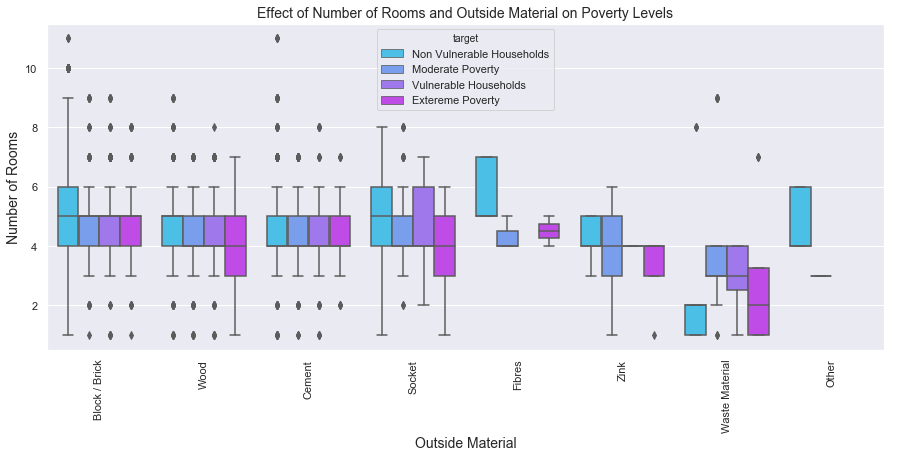

In [21]:
trgt = {1:'Extereme Poverty', 2:'Moderate Poverty', 3: 'Vulnerable Households', 4:'Non Vulnerable Households'}
train['target'] = train['Target'].apply(lambda x : trgt[x])
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x="outside_material", y="rooms", hue="target",  palette="cool", data=train)
plt.title("Effect of Number of Rooms and Outside Material on Poverty Levels", fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Outside Material',fontsize=14)
plt.ylabel('Number of Rooms',fontsize=14)
plt.show()

## 6.6 Effect of Number of Rooms and Floor Material on Poverty Levels 

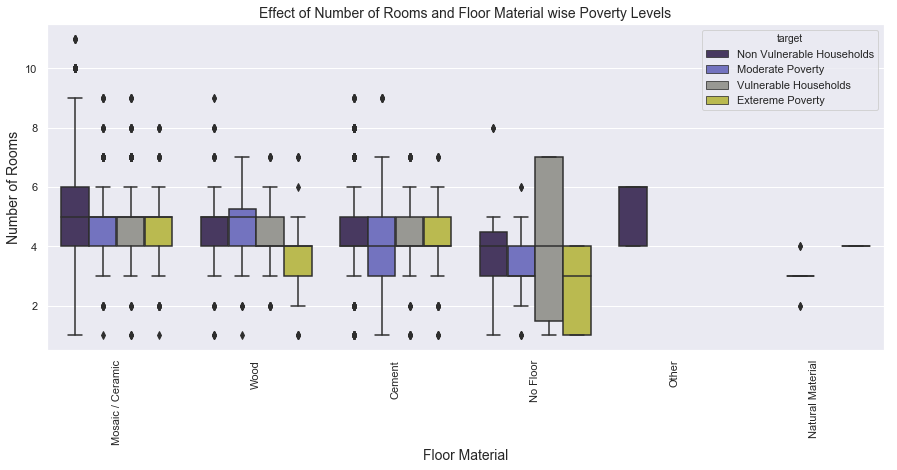

In [22]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x="floor_material", y="rooms", hue="target",  palette="gist_stern", data=train)
plt.title("Effect of Number of Rooms and Floor Material wise Poverty Levels", fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Floor Material',fontsize=14)
plt.ylabel('Number of Rooms',fontsize=14)
plt.show()

#No floor good predictor of poverty 

## 6.7 Effect of Education Details and Household Size on Poverty Levels 

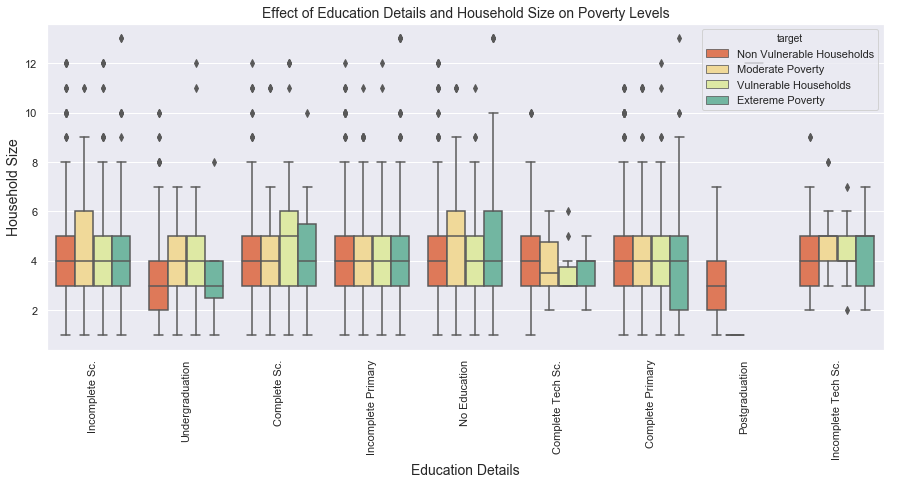

In [23]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x="education_details", y="hhsize", hue="target",  palette="Spectral", data=train)
plt.title("Effect of Education Details and Household Size on Poverty Levels", fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Education Details',fontsize=14)
plt.ylabel('Household Size',fontsize=14)
plt.show()


## 6.8 Effect of Family Members Status and Household Size on Poverty Levels 

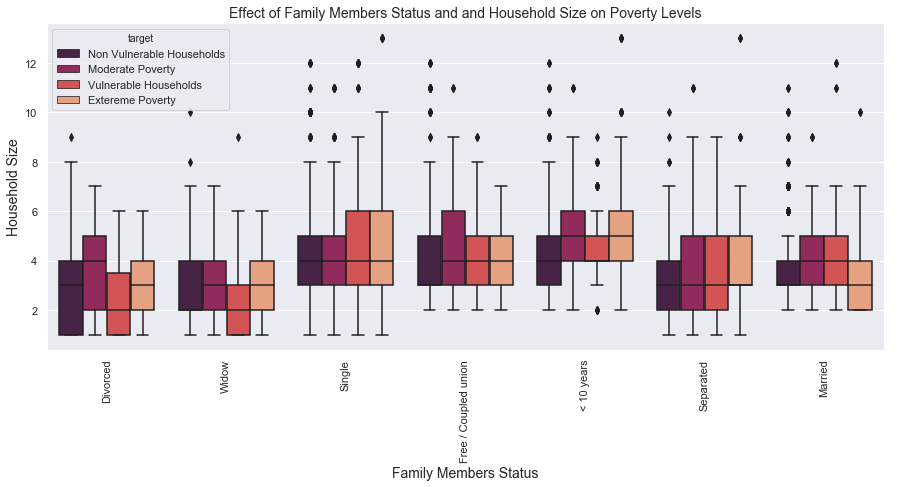

In [24]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x="status_members", y="hhsize", hue="target",  palette="rocket", data=train)
plt.title("Effect of Family Members Status and and Household Size on Poverty Levels", fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Family Members Status',fontsize=14)
plt.ylabel('Household Size',fontsize=14)
plt.show()

## 6.9 Effect of Family Memebrs Type and Household Size on Poverty Levels 

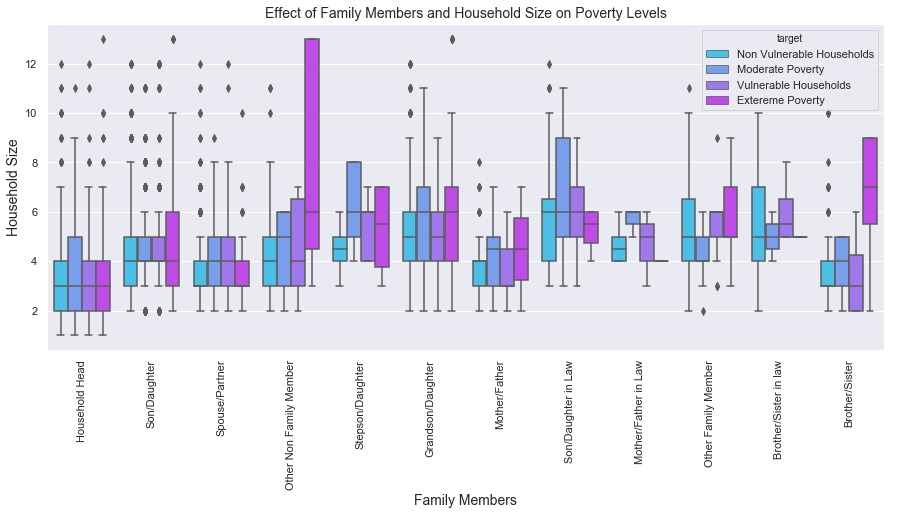

In [25]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x="family_members", y="hhsize", hue="target",  palette="cool", data=train)
plt.title("Effect of Family Members and Household Size on Poverty Levels", fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Family Members',fontsize=14)
plt.ylabel('Household Size',fontsize=14)
plt.show()

#definitely some interesting feature engeneering to do here

## 7. Area / Location Details 

## 7.1 AreaType with respect to Poverty Levels 

In [26]:
train['area_type'] = train['area1'].apply(lambda x: "urbal" if x==1 else "rural")

cols = ['area_type', 'target']
colmap = sns.light_palette("yellow", as_cmap=True)
pd.crosstab(train[cols[1]], train[cols[0]]).style.background_gradient(cmap = colmap)

area_type,rural,urbal
target,,
Extereme Poverty,255,500
Moderate Poverty,545,1052
Non Vulnerable Households,1500,4496
Vulnerable Households,428,781


## 7.2 Region with respect to Poverty Levels 

In [27]:
cols = ['region', 'target']
colmap = sns.light_palette("orange", as_cmap=True)
pd.crosstab(train[cols[0]], train[cols[1]]).style.background_gradient(cmap = colmap)

target,Extereme Poverty,Moderate Poverty,Non Vulnerable Households,Vulnerable Households
region,,,,
Brunca,98,175,406,112
Central,325,752,3923,616
Chorotega,77,161,531,117
Huetar AtlÃƒÂ¡ntica,103,213,438,143
Huetar Norte,69,168,425,109
PacÃƒÂ­fico central,83,128,273,112


<hr>

## Part B: Feature engineering

<hr>

In [7]:
train = pd.read_csv("costa-rican-household-poverty-prediction/train.csv")
test = pd.read_csv("costa-rican-household-poverty-prediction/test.csv")

In [11]:
test['Target'] = np.nan


In [18]:
train_valid = train.loc[train['parentesco1'] == 1, ['idhogar', 'Id', 'Target']].copy()
test_valid = test.loc[test['parentesco1'] == 1, ['idhogar', 'Id']].copy()
# ONly scor eon head of household, having parentesco1 == 1

In [20]:
submit = test[['Id', 'idhogar']] #What we submit to kaggle 

## 8.1 Correcting missing values

In [32]:
train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
                    ...   
bedrooms             int64
overcrowding       float64
tipovivi1            int64
tipovivi2            int64
tipovivi3            int64
tipovivi4            int64
t

In [36]:
#setting the right data type for few columns
mapping = {"yes": 1, "no": 0}

train['dependency'] = train['dependency'].replace(mapping).astype(np.float64)
train['edjefa'] = train['edjefa'].replace(mapping).astype(np.float64)
train['edjefe'] = train['edjefe'].replace(mapping).astype(np.float64)

##
test['dependency'] = test['dependency'].replace(mapping).astype(np.float64)
test['edjefa'] = test['edjefa'].replace(mapping).astype(np.float64)
test['edjefe'] = test['edjefe'].replace(mapping).astype(np.float64)

In [38]:
train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


<hr>

## Part C: Modelling

<hr>

## 8. Baseline Model

### 8.1 Dataset Preparation - Features and Target Variable

In [29]:
#train = pd.read_csv("../input/train.csv")
#test = pd.read_csv("../input/test.csv")

## list of features to be used
features = [c for c in train.columns if c not in ['Id', 'Target']]

## target variable 
target = train['Target'].values
target_index = {1:0, 2:1, 3:2, 4:3}
target = np.array([target_index[c] for c in target])

### 8.2 Label Encode the categorical variables 

In [31]:
def label_encoding(col):
    le = LabelEncoder()
    le.fit(list(train[col].values) + list(test[col].values))
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

num_cols = train._get_numeric_data().columns
cat_cols = list(set(features) - set(num_cols))
for col in cat_cols:
    label_encoding(col)

KeyError: 'waste_method'

### 8.3 Prepare Training and Validation Sets

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train[features].values, target, test_size=0.2, random_state=1)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid)

### 8.4 Baseline LightGBM

In [ ]:
params = {'boosting_type': 'gbdt', 'objective': 'multiclass', 'metric': 'multi_logloss',
          'num_class': 4, 'max_depth': 44, 'num_leaves': 36, 'learning_rate': 0.01,
          'feature_fraction': 0.8, 'bagging_fraction': 0.8, 'bagging_freq': 5,
          'lambda_l2': 1.0, 'verbose': -1, 'num_threads': -1 }

model = lgb.train(params, lgb_train, num_boost_round=100,  valid_sets=[lgb_train, lgb_valid], 
                  early_stopping_rounds=2000, verbose_eval=100)

### 8.5 Predict and Submit

In [ ]:
## predictions
preds = model.predict(test[features], num_iteration=model.best_iteration)

## revert back to original classes
reverse_index = {}
for k,v in target_index.items():
    reverse_index[v] = k
preds = [reverse_index[np.argmax(p)] for p in preds]

## submission
subs = pd.DataFrame()
subs['Id'] = test['Id']
subs['Target'] = preds
subs.to_csv('submission.csv', index=False)
subs.head()

Further Improvement Ideas for Model. 
- Feature Engineering  
- Model Tuning  
- Model Ensembling  